In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"
read_mouse_drug_data_to_load = pd.read_csv(mouse_drug_data_to_load)
read_clinical_trial_data_to_load=pd.read_csv(clinical_trial_data_to_load)
# Read the Mouse and Drug Data and the Clinical Trial Data
frame_mouse_drug_data_to_load = pd.DataFrame(read_mouse_drug_data_to_load)
frame_clinical_trial_data_to_load = pd.DataFrame(read_clinical_trial_data_to_load)

# Combine the data into a single dataset
data_frame = pd.merge(frame_clinical_trial_data_to_load,frame_mouse_drug_data_to_load , on="Mouse ID", how="left")

# Display the data table for preview
data_frame.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Mean_Tumor= data_frame.groupby(['Drug','Timepoint']).mean()["Tumor Volume (mm3)"]
# Convert to DataFrame
Mean_Tumor = pd.DataFrame(Mean_Tumor)
data_frame_Mean_Tumor = pd.DataFrame(Mean_Tumor).reset_index()
# Preview DataFrame
d = dict(selector="th", props=[('text-align','right')],datatype= float)
Format_data_frame_Mean_Tumor=data_frame_Mean_Tumor .style.set_properties(**{'width':'10em', 'text-align':'right'}).set_table_styles([d])
Format_data_frame_Mean_Tumor

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45
1,Capomulin,5,44.2661
2,Capomulin,10,43.0843
3,Capomulin,15,42.0643
4,Capomulin,20,40.7163
5,Capomulin,25,39.9395
6,Capomulin,30,38.7693
7,Capomulin,35,37.8168
8,Capomulin,40,36.958
9,Capomulin,45,36.2361


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Error_Tumor= data_frame.groupby(['Drug','Timepoint'])
# Convert to DataFrame
Frame_Error = pd.DataFrame({"Error Tumor Volume (mm3)": Error_Tumor["Tumor Volume (mm3)"].sem()}).reset_index()
# Preview DataFrame
Reformat_Error = Frame_Error.pivot_table('Error Tumor Volume (mm3)' , 'Timepoint', 'Drug'  )
Frame_Error.head(5)


,Drug,Timepoint,Error Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
Reformat_Means = data_frame.pivot_table('Tumor Volume (mm3)' , 'Timepoint', 'Drug'  )
# Preview that Reformatting worked
Reformat_Means

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


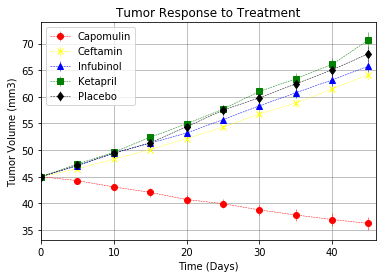

In [5]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 10, 1)
fig, ax = plt.subplots()
ax.errorbar(x_axis*5,Reformat_Means['Capomulin'] ,Reformat_Error['Capomulin'],  color="red", label="Capomulin", fmt="o" , linestyle="dashed", linewidth=.5)
ax.errorbar(x_axis*5, Reformat_Means['Ceftamin'] ,Reformat_Error['Ceftamin'],  color="yellow", label="Ceftamin", fmt="x" , linestyle="dashed",  linewidth=.5)
ax.errorbar(x_axis*5, Reformat_Means['Infubinol'] ,Reformat_Error['Infubinol'], color="blue", label="Infubinol", fmt="^" , linestyle="dashed",  linewidth=.5)
ax.errorbar(x_axis*5, Reformat_Means['Ketapril'] ,Reformat_Error['Ketapril'], color="green", label="Ketapril", fmt="s" , linestyle="dashed",  linewidth=.5)
ax.errorbar(x_axis*5, Reformat_Means['Placebo'] ,Reformat_Error['Placebo'], color="black", label="Placebo", fmt="d" , linestyle="dashed", linewidth=.5)
ax.errorbar
ax.set_xlim(0, 46)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel('Tumor Volume (mm3)')
plt.grid(zorder=0,color='grey', linestyle='-', linewidth=1, alpha=0.5)
plt.legend()
# Save the Figure
plt.savefig("TumorResponseTotreatment.png")


In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Mean_Metastatic = data_frame.groupby(['Drug','Timepoint']).mean()
# Convert to DataFrame
data_frame_Mean_Metastatic = pd.DataFrame(Mean_Metastatic['Metastatic Sites'])
# Preview DataFrame
d = dict(selector="th", props=[('text-align','right')],datatype= float)
Format_data_frame_Mean_Metastatic=data_frame_Mean_Metastatic.style.set_properties(**{'width':'10em', 'text-align':'right'}).set_table_styles([d])
Format_data_frame_Mean_Metastatic

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Error_Metastatic = data_frame.groupby(['Drug','Timepoint']).sem()
# Convert to DataFrame
data_frame_Error_Metastatic= pd.DataFrame(Error_Metastatic['Metastatic Sites'])#.reset_index()
# Preview DataFrame
data_frame_Error_Metastatic.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
Reformat_Means_Meta = data_frame.pivot_table('Metastatic Sites' , 'Timepoint', 'Drug'  )
# Preview that Reformatting worked
Reformat_Means_Meta


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Error_Tumor_Meta= data_frame.groupby(['Drug','Timepoint'])
Frame_Error_Meta = pd.DataFrame({"Error Metastatic Sites": Error_Tumor_Meta['Metastatic Sites'].sem()})
# Convert to DataFrame
d = dict(selector="th", props=[('text-align','right')],datatype= float)
Format_Frame_Error_Meta=Frame_Error_Meta.style.set_properties(**{'width':'10em', 'text-align':'right'}).set_table_styles([d])
Reformat_Error_Meta = Frame_Error_Meta.pivot_table('Error Metastatic Sites', 'Timepoint', 'Drug'  )
# Preview DataFrame
Format_Frame_Error_Meta

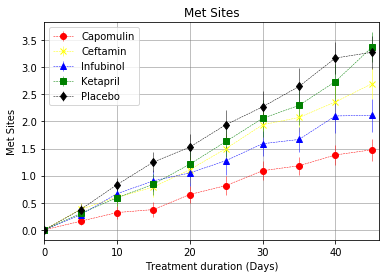

In [11]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 10, 1)
fig, ax = plt.subplots()
ax.errorbar(x_axis*5, Reformat_Means_Meta['Capomulin'] ,Reformat_Error_Meta['Capomulin'],  color="red", label="Capomulin", fmt="o" , linestyle="dashed", linewidth=.5)
ax.errorbar(x_axis*5, Reformat_Means_Meta['Ceftamin'] , Reformat_Error_Meta['Ceftamin'],  color="yellow", label="Ceftamin", fmt="x" , linestyle="dashed", linewidth=.5)
ax.errorbar(x_axis*5, Reformat_Means_Meta['Infubinol'],Reformat_Error_Meta['Infubinol'], color="blue", label="Infubinol", fmt="^" , linestyle="dashed", linewidth=.5)
ax.errorbar(x_axis*5, Reformat_Means_Meta['Ketapril'] , Reformat_Error_Meta['Ketapril'], color="green", label="Ketapril", fmt="s" , linestyle="dashed",linewidth=.5)
ax.errorbar(x_axis*5, Reformat_Means_Meta['Placebo'] ,Reformat_Error_Meta['Placebo'], color="black", label="Placebo", fmt="d" , linestyle="dashed",linewidth=.5)
ax.errorbar
ax.set_xlim(0, 46)
plt.title("Met Sites")
plt.xlabel("Treatment duration (Days)")
plt.ylabel('Met Sites')
plt.grid(zorder=0,color='grey', linestyle='-', linewidth=1, alpha=0.5)
plt.legend()
# Save the Figure
plt.savefig("MetastaticResponseToTreatment.png")
# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mean_Survival = data_frame.groupby(['Drug','Timepoint']).count()
# Convert to DataFrame
data_frame_Mean_Metastatic = pd.DataFrame(Mean_Survival['Mouse ID']).reset_index()
# Preview DataFrame
data_frame_Mean_Metastatic.head(5)

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
Reformat = data_frame_Mean_Metastatic.pivot_table('Mouse ID' , 'Timepoint', 'Drug'  )
# Preview the Data Frame
Reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


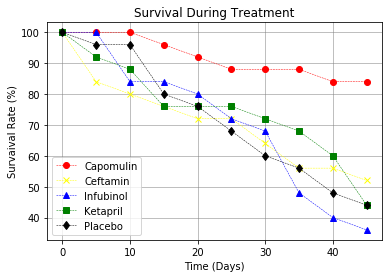

In [14]:
# Generate the Plot (Accounting for percentages)
Capomulin = [round(s/max(Reformat['Capomulin'])*100,2) for s in Reformat['Capomulin']]
Ceftamin = [round(s/max(Reformat['Ceftamin'])*100,2) for s in Reformat['Ceftamin']]
Infubinol = [round(s/max(Reformat['Infubinol'])*100,2) for s in Reformat['Infubinol']]
Ketapril = [round(s/max(Reformat['Ketapril'])*100,2) for s in Reformat['Ketapril']]
Placebo = [round(s/max(Reformat['Placebo'])*100,2) for s in Reformat['Placebo']]
x_axis = np.arange(0, 10, 1)
gCapomulin, = plt.plot(x_axis*5, Capomulin, color="red", label="Capomulin", marker='o',linestyle="dashed", linewidth=.5)
gCeftamin, = plt.plot(x_axis*5, Ceftamin, color="yellow", label="Ceftamin", marker='x',linestyle="dashed", linewidth=.5)
gInfubinol, = plt.plot(x_axis*5, Infubinol, color="blue", label="Infubinol", marker='^',linestyle="dashed", linewidth=.5)
gKetapril, = plt.plot(x_axis*5, Ketapril, color="green", label="Ketapril", marker='s',linestyle="dashed", linewidth=.5)
gPlacebo, = plt.plot(x_axis*5, Placebo, color="black", label="Placebo", marker='d',linestyle="dashed", linewidth=.5)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel('Survaival Rate (%)')
plt.grid(zorder=0,color='grey', linestyle='-', linewidth=1, alpha=0.5)
plt.legend()
# Save the Figure
plt.savefig("SurvivalRates.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
Mean_Tumor_Last= data_frame_Mean_Tumor.groupby(['Drug'])['Tumor Volume (mm3)'].last()
Mean_Tumor_First=data_frame_Mean_Tumor.groupby(['Drug'])['Tumor Volume (mm3)'].first()
Mean_Tumor_Total = (Mean_Tumor_Last-Mean_Tumor_First)/Mean_Tumor_First
# Display the data to confirm
Mean_Tumor_Total.map("{:.2%}".format)

Drug
Capomulin    -19.48%
Ceftamin      42.52%
Infubinol     46.12%
Ketapril      57.03%
Naftisol      53.92%
Placebo       51.30%
Propriva      47.24%
Ramicane     -22.32%
Stelasyn      52.09%
Zoniferol     46.58%
Name: Tumor Volume (mm3), dtype: object

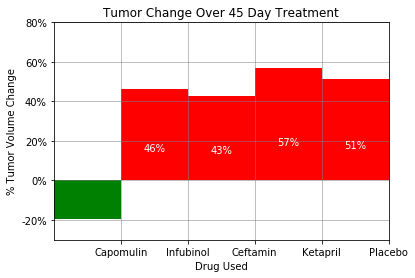

In [20]:
# Store all Relevant Percent Changes into a Tuple
data = [Mean_Tumor_Total['Capomulin'], 
        Mean_Tumor_Total['Infubinol'],                 
        Mean_Tumor_Total['Ceftamin'], 
        Mean_Tumor_Total['Ketapril'], 
        Mean_Tumor_Total['Placebo']]

# Splice the data between passing and failing drugs
x = np.arange(len(data))
mask1x=[]
mask1y=[]
mask2x=[]
mask2y=[]
for s in range(len(data)):
    if data[s] > 0 :
        mask1y.append(data[s])
        mask1x.append(s)
    else:
        mask2y.append(data[s])
        mask2x.append(s)

fig, ax = plt.subplots()        
ax.bar(mask2x, mask2y, color = 'green', width =-1, alpha=1, align="edge")
ax.bar(mask1x, mask1y, color = 'red', width =-1, alpha=1, align="edge")

#plt.show()

# Orient widths. Add labels, tick marks, etc. 

tick_locations = [value for value in x]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ceftamin", "Ketapril", "Placebo"])
plt.grid(zorder=0,color='grey', linestyle='-', linewidth=1, alpha=0.5)
plt.xlim(-1,4)
plt.ylim(-.30, .80)

# Use functions to label the percentages of changes
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug Used")
plt.ylabel("% Tumor Volume Change")

# Call functions to implement the function calls
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .3*height,
                '%.0f' % float(height*100) +"%",
        ha='center', va='bottom', color = 'white')

autolabel(plot)

# Save the Figure
plt.savefig("TumorVolumeChange.png")

# Show the Figure
fig.show()